The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

**Importing the libraries**.

In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

#loading the dataset
nobel_data=pd.read_csv("data/nobel.csv")

**Overviewing the dataset**.

In [5]:
# Displaying the first 10 rows of the nobel_data DataFrame
print(nobel_data.head(10))

   year    category  ...      death_city   death_country
0  1901   Chemistry  ...          Berlin         Germany
1  1901  Literature  ...        Châtenay          France
2  1901    Medicine  ...         Marburg         Germany
3  1901       Peace  ...          Heiden     Switzerland
4  1901       Peace  ...           Paris          France
5  1901     Physics  ...          Munich         Germany
6  1902   Chemistry  ...          Berlin         Germany
7  1902  Literature  ...  Charlottenburg         Germany
8  1902    Medicine  ...    Putney Heath  United Kingdom
9  1902       Peace  ...            Bern     Switzerland

[10 rows x 18 columns]


**What is the most commonly awarded gender and birth country?**

In [6]:
# Checking for the column names representing gender and birth country
nobel_data.columns

# Most commonly awarded gender
# Using value_counts() to count occurrences of each gender and selecting the most common one
top_gender = nobel_data["sex"].value_counts().index[0]

# Most commonly awarded birth country
# Using value_counts() to count occurrences of each birth country and selecting the most common one
top_country = nobel_data["birth_country"].value_counts().index[0]

# The variables top_gender and top_country now hold the most commonly awarded gender and birth country, respectively

# Printing top gender and top country with proper format
print(f"The most commonly awarded gender is: {top_gender}")
print(f"The most commonly awarded birth country is: {top_country}")

The most commonly awarded gender is: Male
The most commonly awarded birth country is: United States of America


**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

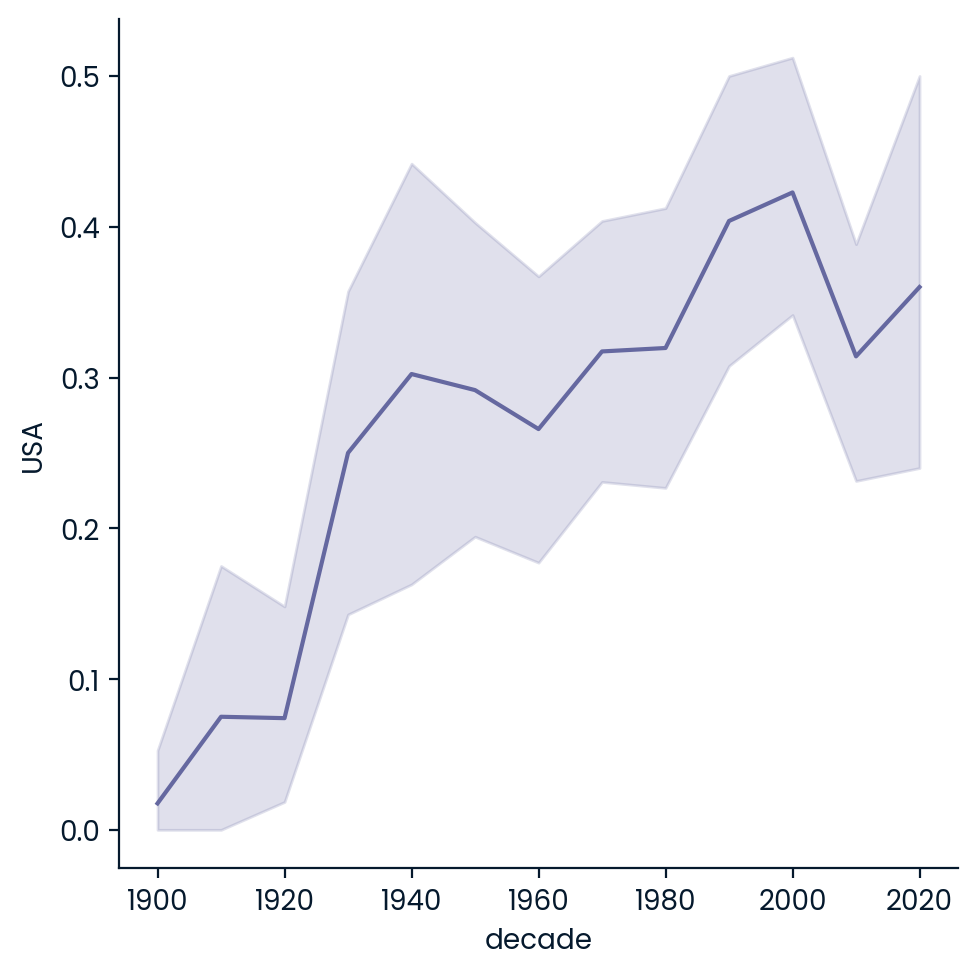

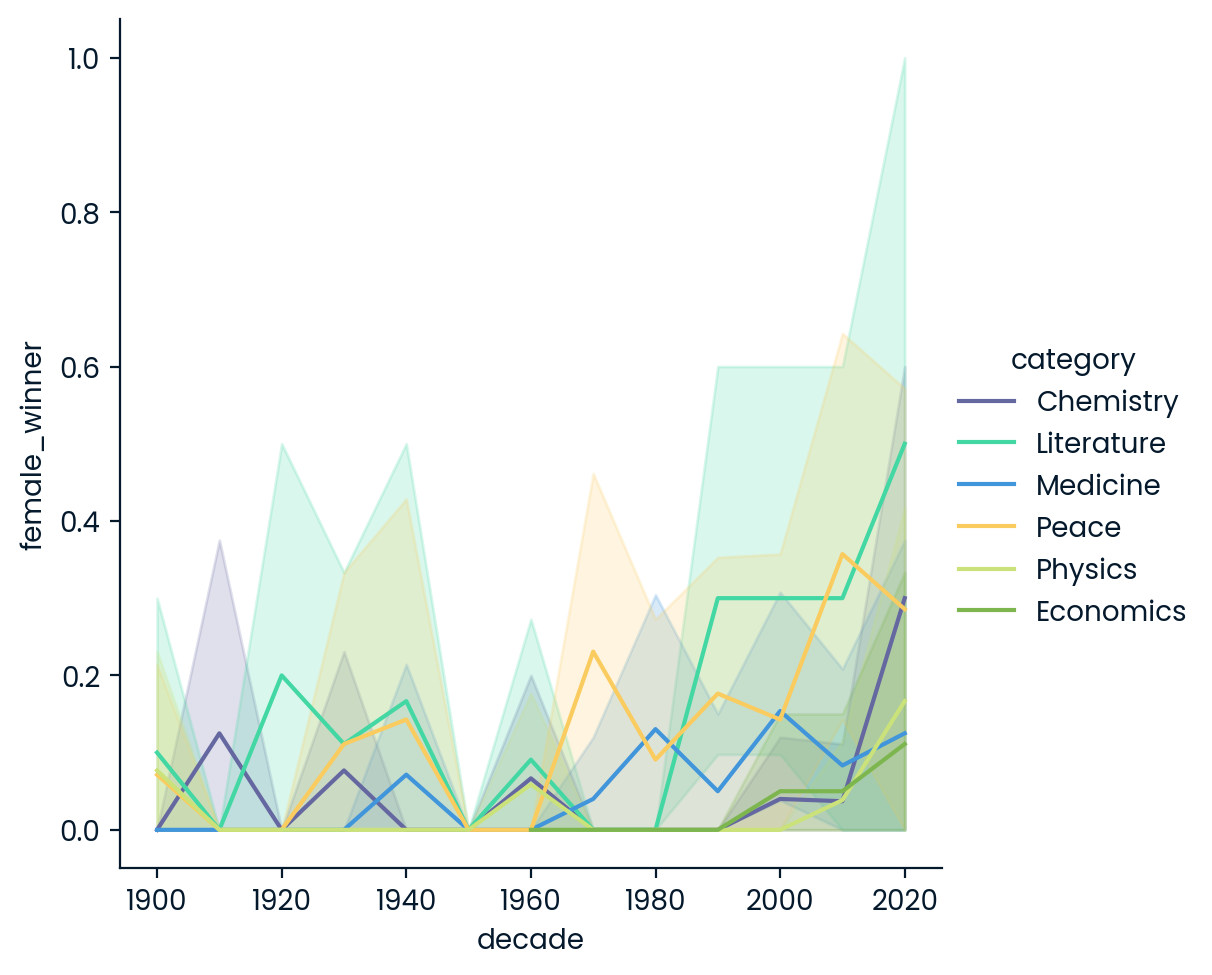

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the US-born winners column
nobel_data["USA"] = nobel_data["birth_country"] == "United States of America"

# Create the decade column
nobel_data["decade"] = (np.floor(nobel_data["year"] / 10) * 10).astype(int)

# Finding the ratio and identifying the decade with the highest ratio of US-born winners
usa_decade_group = nobel_data.groupby("decade")["USA"].mean()
max_decade_usa = usa_decade_group.idxmax()

# Create a relational line plot for US-born winners by decade
sns.relplot(x="decade", y="USA", data=nobel_data, kind="line")
plt.show()

# Filtering for female winners
nobel_data["female_winner"] = nobel_data["sex"] == "Female"

# Group by decade and category to find the mean ratio of female winners
female_group = nobel_data.groupby(["decade", "category"])["female_winner"].mean()
maxi = female_group.idxmax()
max_female_dict = {maxi[0]: maxi[1]}

# Create a relational line plot for female winners by decade and category
sns.relplot(x="decade", y="female_winner", data=nobel_data, kind="line", hue="category")
plt.show()

**Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

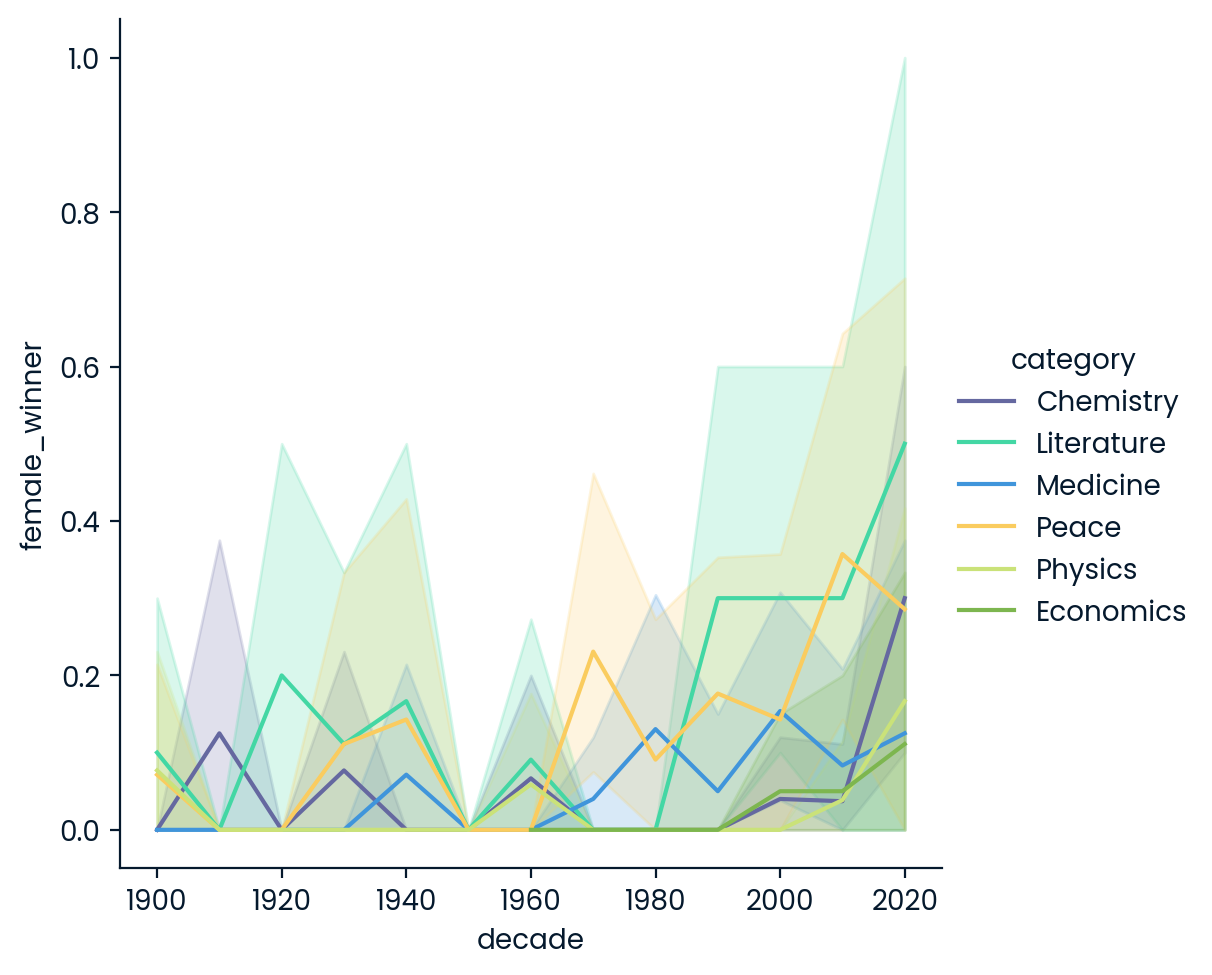

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering for female winners
nobel_data["female_winner"] = nobel_data["sex"] == "Female"

# Group by decade and category, then calculate the mean proportion of female winners
female_group = nobel_data.groupby(["decade", "category"])["female_winner"].mean()

# Find the combination of decade and category with the highest proportion of female winners
maxi = female_group.idxmax()

# Create a dictionary with the decade as the key and the category as the value
max_female_dict = {maxi[0]: maxi[1]}

# Plot the proportion of female winners over decades for each category
sns.relplot(x="decade", y="female_winner", data=nobel_data, kind="line", hue="category")
plt.show()

**Who was the first woman to receive a Nobel Prize, and in what category?**

In [41]:
# Filter the dataset for female winners and sort by the year in ascending order
first_woman = nobel_data[nobel_data["female_winner"]].sort_values(by="year").iloc[0]

# Extract the name of the first female laureate
first_woman_name = first_woman["full_name"]

# Extract the category of the first female laureate
first_woman_category = first_woman["category"]

# Print the result
print(f"The first woman to receive Nobel Prize was {first_woman_name} and the category was {first_woman_category}.")

The first woman to receive Nobel Prize was Marie Curie, née Sklodowska and the category was Physics.


**Which individuals or organizations have won more than one Nobel Prize throughout the years?**

In [42]:
# Count the occurrences of each laureate's name in the dataset
counts = nobel_data["full_name"].value_counts()

# Filter for laureates who have won 2 or more Nobel Prizes
counts = counts[counts >= 2].index

# Convert the filtered laureate names to a list
repeat_list=list(counts)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
